In [2]:
#downloading MINST dataset
import torch
import torchvision.transforms as transforms
from torchvision import datasets
 
# loading training data
train_dataset = datasets.MNIST(root='./data', 
                               train=True, 
                               transform=transforms.ToTensor(),
                               download=True)
#loading test data
test_dataset = datasets.MNIST(root='./data', 
                              train=False, 
                              transform=transforms.ToTensor())

In [4]:
print(f"Number of trainingsamples {len(train_dataset)} \n number of test samples {len(test_dataset)}")

Number of trainingsamples 60000 
 number of test samples 10000


[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

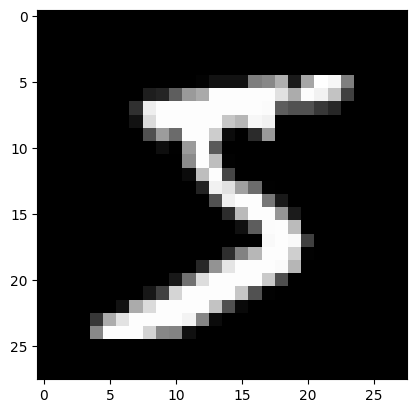

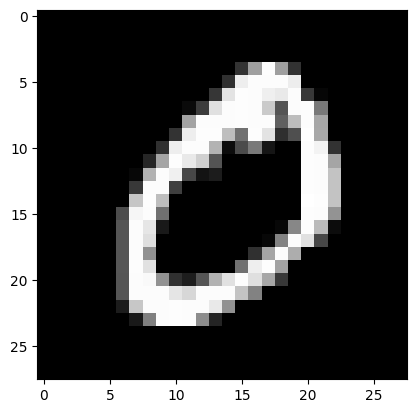

In [22]:
import matplotlib.pyplot as plt
img_5 = train_dataset[0][0].numpy().reshape(28, 28)
print(img_5)
plt.imshow(img_5, cmap='gray')
plt.show()
img_0 = train_dataset[1][0].numpy().reshape(28, 28)
plt.imshow(img_0, cmap='gray')
plt.show()

In [13]:
from torch.utils.data import DataLoader
batach_size = 32
train_loader = DataLoader(dataset=train_dataset, batch_size=batach_size, shuffle=True) 
test_loader = DataLoader(dataset=test_dataset, batch_size=batach_size, shuffle=False)

In [38]:
class LogisticRegression(torch.nn.Module):    
    # build the constructor
    def __init__(self, n_inputs, n_outputs):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(n_inputs, n_outputs)
    # make predictions
    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred

In [39]:
n_inputs = 28*28 # makes a 1D vector of 784
n_outputs = 10
log_regr = LogisticRegression(n_inputs, n_outputs)

In [40]:
optimizer = torch.optim.SGD(log_regr.parameters(), lr=0.001)
# defining Cross-Entropy loss
criterion = torch.nn.CrossEntropyLoss()
 
epochs = 10
Loss = []
acc = []
for epoch in range(epochs):
    for i, (images, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = log_regr(images.view(-1, 28*28))
        loss = criterion(outputs, labels)
        # Loss.append(loss.item())
        loss.backward()
        optimizer.step()
    Loss.append(loss.item())
    correct = 0
    for images, labels in test_loader:
        outputs = log_regr(images.view(-1, 28*28))
        _, predicted = torch.max(outputs.data, 1)
        correct += (predicted == labels).sum()
    accuracy = 100 * (correct.item()) / len(test_dataset)
    acc.append(accuracy)
    print('Epoch: {}. Loss: {}. Accuracy: {}'.format(epoch, loss.item(), accuracy))

Epoch: 0. Loss: 2.188944101333618. Accuracy: 63.48
Epoch: 1. Loss: 2.0977065563201904. Accuracy: 75.79
Epoch: 2. Loss: 2.0766003131866455. Accuracy: 79.16
Epoch: 3. Loss: 1.9874589443206787. Accuracy: 80.3
Epoch: 4. Loss: 2.016772747039795. Accuracy: 81.18
Epoch: 5. Loss: 1.9246798753738403. Accuracy: 81.8
Epoch: 6. Loss: 1.8917410373687744. Accuracy: 82.23
Epoch: 7. Loss: 1.850682258605957. Accuracy: 82.62
Epoch: 8. Loss: 1.8983947038650513. Accuracy: 82.81
Epoch: 9. Loss: 1.8201439380645752. Accuracy: 83.18
Epoch: 10. Loss: 1.843867540359497. Accuracy: 83.35
Epoch: 11. Loss: 1.8412271738052368. Accuracy: 83.55
Epoch: 12. Loss: 1.7895333766937256. Accuracy: 83.72
Epoch: 13. Loss: 1.7961903810501099. Accuracy: 83.88
Epoch: 14. Loss: 1.784941554069519. Accuracy: 84.07
Epoch: 15. Loss: 1.8935080766677856. Accuracy: 84.24
Epoch: 16. Loss: 1.7852929830551147. Accuracy: 84.29
Epoch: 17. Loss: 1.727115511894226. Accuracy: 84.45
Epoch: 18. Loss: 1.787672996520996. Accuracy: 84.56
Epoch: 19. L

In [58]:
#Linear regression implementation
import torch.nn as nn

lin_reg_model = nn.Sequential(
    nn.Linear(28*28,10),
    nn.Sigmoid()
)
print(lin_reg_model)

Sequential(
  (0): Linear(in_features=784, out_features=10, bias=True)
  (1): Sigmoid()
)


In [68]:
optimizer = torch.optim.Adam(lin_reg_model.parameters(), lr=0.001)
# defining Cross-Entropy loss
criterion = torch.nn.CrossEntropyLoss()
 
epochs = 10
Loss = []
acc = []
for epoch in range(epochs):
    for i, (images, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = lin_reg_model(images.view(-1, 28*28))
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    Loss.append(loss.item())
    correct = 0
    for images, labels in test_loader:
        outputs = lin_reg_model(images.view(-1, 28*28))
        _, predicted = torch.max(outputs.data, 1)
        correct += (predicted == labels).sum()
    accuracy = 100 * (correct.item()) / len(test_dataset)
    acc.append(accuracy)
    print('Epoch: {}. Loss: {}. Accuracy: {}'.format(epoch, loss.item(), accuracy))

Epoch: 0. Loss: 1.5811436176300049. Accuracy: 91.15
Epoch: 1. Loss: 1.6893229484558105. Accuracy: 91.18
Epoch: 2. Loss: 1.5285147428512573. Accuracy: 91.3
Epoch: 3. Loss: 1.5489988327026367. Accuracy: 91.45
Epoch: 4. Loss: 1.5858972072601318. Accuracy: 91.51
Epoch: 5. Loss: 1.5426923036575317. Accuracy: 91.63
Epoch: 6. Loss: 1.486717700958252. Accuracy: 91.6
Epoch: 7. Loss: 1.5077238082885742. Accuracy: 91.5
Epoch: 8. Loss: 1.5349273681640625. Accuracy: 91.71
Epoch: 9. Loss: 1.5110632181167603. Accuracy: 91.84


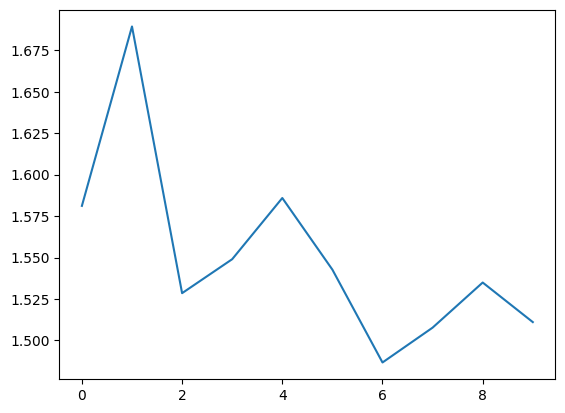

In [69]:
plt.plot(range(len(Loss)), Loss)
#plt.plot(range(len(acc)), acc)

In [1]:
from sklearn import datasets # Import train_test_split function
from sklearn.model_selection import train_test_split  #Import scikit-learn dataset library
from sklearn import svm #Import svm model
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import numpy as np

In [30]:
images_train, labels_train = zip(*train_dataset)
images_train = np.array(images_train)
labels_train = np.array(labels_train)

In [32]:
clf = svm.SVC(kernel="linear")
images_train = images_train.reshape(images_train.shape[0], -1)


In [33]:
images_train.shape

(60000, 784)

In [34]:
clf.fit(images_train, labels_train)

SVC(kernel='linear')

In [36]:
images_test, labels_test = zip(*test_dataset)
images_test = np.array(images_test)
labels_test = np.array(labels_test)
images_test = images_test.reshape(images_test.shape[0], -1)
svm_pred = clf.predict(images_test)

In [37]:
print(metrics.accuracy_score(labels_test, svm_pred))

0.9404
